In [1]:
import copy
import numpy as np
import pandas as pd
import timeit
import inspect
import time
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
def fact(x):
    if x == 1:
        return 1
    else:
        return int(x) * int(fact(x-1))
    
def fact_loop(x):
    
    if x < 0:
        return
    
    result = 1
    for i in range(1,x+1):
        result = result*i
        
    return result


def create_random_array(low,high,size,seed):    
    np.random.seed(seed)
    integer_array = np.random.randint(low,high,size)   
    return integer_array  #  np.sort(integer_array, kind='quicksort' )



In [5]:
# Test
print(fact(10))
print(fact_loop(10))

3628800
3628800


### 1.

Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).

In [8]:
array = list(create_random_array(low=100,high=500+1,size=10, seed=1))
array = sorted(array)
array

[137, 172, 233, 244, 303, 335, 355, 435, 493, 496]

This code section creates the random array of 10 integers between 100 and 500. **I have sorted the array so that the graph shows the increase in time as the size increase.**


### 2.
Calculate the factorial of each of the numbers using a simple FOR loop. Please capture the
start/end times and store the results in an array, or linked list, or dictionary

In [20]:
stored_times_loop = []

for element in array:
    
    start = time.perf_counter()    
    fact_loop(element)
    end = time.perf_counter()
    total_time1 = end-start
    stored_times_loop.append(total_time1)
    print(element, total_time1)

137 6.113300014476408e-05
172 6.604099985452194e-05
233 8.745999980419583e-05
244 9.236799996870104e-05
303 0.00012672699995164294
335 0.00014368400002240378
355 0.00014859199995953531
435 0.00021106300005158118
493 0.0002507770000192977
496 0.0002503309999610792


### Discussion:

The loop above iterates over the array elements and stores run time from the ***loop*** function in a list data structure that will be aggregated in the next step.

### 3.

Calculate the factorial of each of the numbers using recursion. Please capture the start/end times
and store the results in an array, or linked list, or dictionary.

In [21]:
stored_times_recursive =  []

for element in array:
    start = time.perf_counter()
    fact(element)
    end = time.perf_counter()
    total_time2 = end-start
    stored_times_recursive.append(total_time2)    
    print(element, total_time2)

137 0.0004007079999155394
172 0.00045113100009075424
233 0.0006461299999500625
244 0.0006229260000054637
303 0.0007750889999442734
335 0.0009053850001237151
355 0.0009517919997961144
435 0.0012297890000354528
493 0.0014234489999580546
496 0.0010575470000731002


### Discussion:

The loop above iterates over the array elements and stores run time from the ***recursive*** function in a list data structure that will be aggregated in the next step.

### 4.
Organize the results of the study into a table showing the number, it's factorial, the time to calculate
the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.

In [22]:
data_df = pd.DataFrame([array,stored_times_recursive,stored_times_loop]).T
data_df.columns = ['size', 'recursive', 'loop']
data_df['difference'] = data_df.recursive -  data_df.loop
data_df

,size,recursive,loop,difference
0,137.0,0.000401,0.000061,0.000340
1,172.0,0.000451,0.000066,0.000385
2,233.0,0.000646,0.000087,0.000559
3,244.0,0.000623,0.000092,0.000531
4,303.0,0.000775,0.000127,0.000648
5,335.0,0.000905,0.000144,0.000762
6,355.0,0.000952,0.000149,0.000803
7,435.0,0.001230,0.000211,0.001019
8,493.0,0.001423,0.000251,0.001173
9,496.0,0.001058,0.000250,0.000807


### Discussion:

We summarize the data in pandas dataframe and calculate the difference between loop and recursive factorial functions.



### 5. 
Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and
with execution time in milliseconds on the vertical axis. The plot should show execution times of
recursion and the loop.

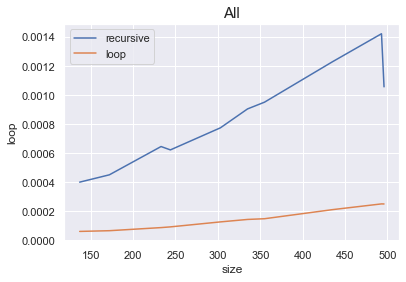

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax2 = plt.twinx()
sns.lineplot(data=data_df, x="size", y="recursive",label='recursive')
# ax1.legend(loc='upper left')

# sns.lineplot(data=data_df, x="size", y="loop",label='loop', ax=ax2)
sns.lineplot(data=data_df, x="size", y="loop",label='loop' )

ax2.grid(False)
ax2.legend(loc='upper left' )
plt.title('All',fontsize= 15);

### Discussion: 
The graph shows that both approaches increase linearly as the ***n*** increases. This is within the expectation of big O for the factorial calculation using recursion or loops. Both algorithms have big O of O(n).

However, the recursive code is slower overall. This reduced efficiency is coming from the overhead that is generated by creating a stack that stores the function call that is then executed and returns and completes the operations in reverse. The  lower efficieny of recursion is ralated to the space compexity.  This is also within the expectations 

# Executive Summary

In this exercise, we compared the execution time of the function that calculates the factorial by using 1) recursion algorithm, 2) loop approach. The methodology consist of the following steps:

1. Get an array of size 10 of random integers between 100 and 500
2. run factorial function and measure time using a loop
3. run factorial function and measure time using a recursion 
4. Organize results in pandas data frame
5. compare the execution time of two algorithms 

 
For this exercise, I measured the start and end time using time.clock() utility in python. The total time is calculated using the difference between end and start time (end-start). The array was sorted before running the factorial function. The plot that compares the execution time of the two methods is shown below: 

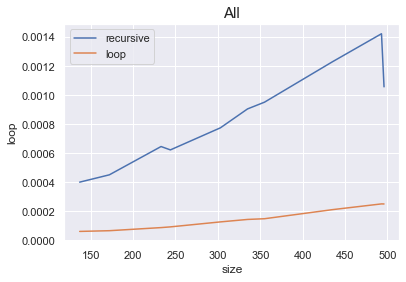

When considering big O for recursive function using either method there are two dimensions to consider 1) time complexity 2) space complexity. The difference between the two is the following:

"Time complexity of an algorithm quantifies the amount of time taken by an algorithm to run as a function of the length of the input. Similarly, the space complexity of an algorithm quantifies the amount of space or memory taken by an algorithm to run as a function of the length of the input."<sup>1</sup>

For factorial function time complexity big O is expressed as O(n) for both approaches indicating a linear relationship between time and n. Space complexity for recursive function is O(n) while space complexity for loop approach  is O(1).<sup>2</sup> 

Our approach only measures time complexity. The graph shows that both approaches increase linearly as the ***n*** increases. This is within the expectation of big O for the factorial calculation using recursion or loops. 

However, the recursive code is slower overall. This reduced efficiency is coming from the overhead that is generated by creating a stack that stores the function calls that is then executed and completes the operations in reverse. The  lower efficieny of recursion is ralated to the space compexity.  This is also within the expectations.<sup>3</sup> 

In conclusion both method have shown to exibit big O of O(n). However, recursion is slower due to storage overhead which relates to space compexity. 

1. https://www.hackerearth.com/practice/basic-programming/complexity-analysis/time-and-space-complexity/tutorial/#:~:text=Time%20complexity%20of%20an%20algorithm,the%20length%20of%20the%20input.&text=Let%20each%20operation%20takes%20time.

2. https://stackoverflow.com/questions/21128308/is-the-big-o-notation-the-same-for-memoized-recursion-versus-iteration

3. https://stackoverflow.com/questions/7703258/why-is-factorial-recursive-function-less-efficient-than-a-normal-factorial-funct#:~:text=In%20the%20recursive%20code%2C%20there,why%2C%20the%20performance%20is%20slow.